In [1]:
from matplotlib.font_manager import fontManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font='Malgun Gothic',
       rc ={'axes.unicode_minus':False},
       style='whitegrid')

## data

In [2]:
prfm = pd.read_excel("../../data/train/performance.xlsx", header=1)
rating = pd.read_excel("../../data/train/ratings.xlsx", header=1)
test = pd.read_excel("../../data/test/test.xlsx", header=1)

df = prfm.copy()

In [3]:
all_df = pd.concat([prfm, test])

### missing value detection

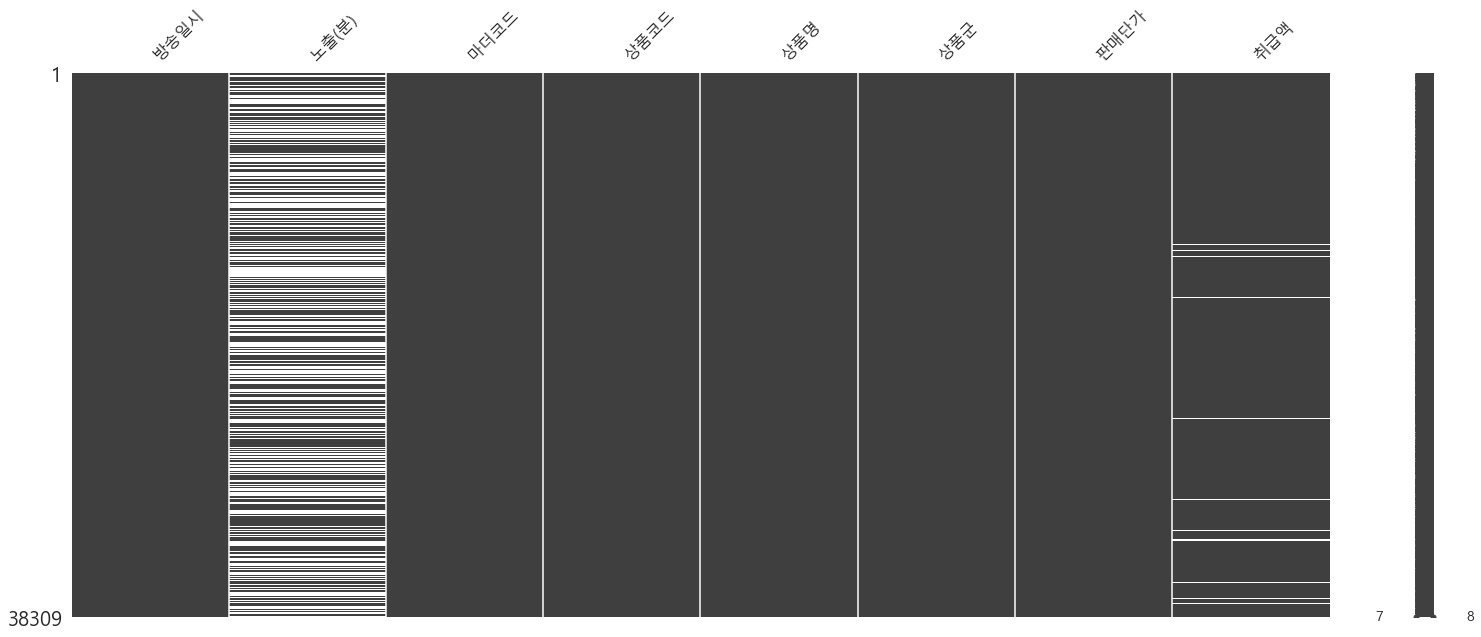

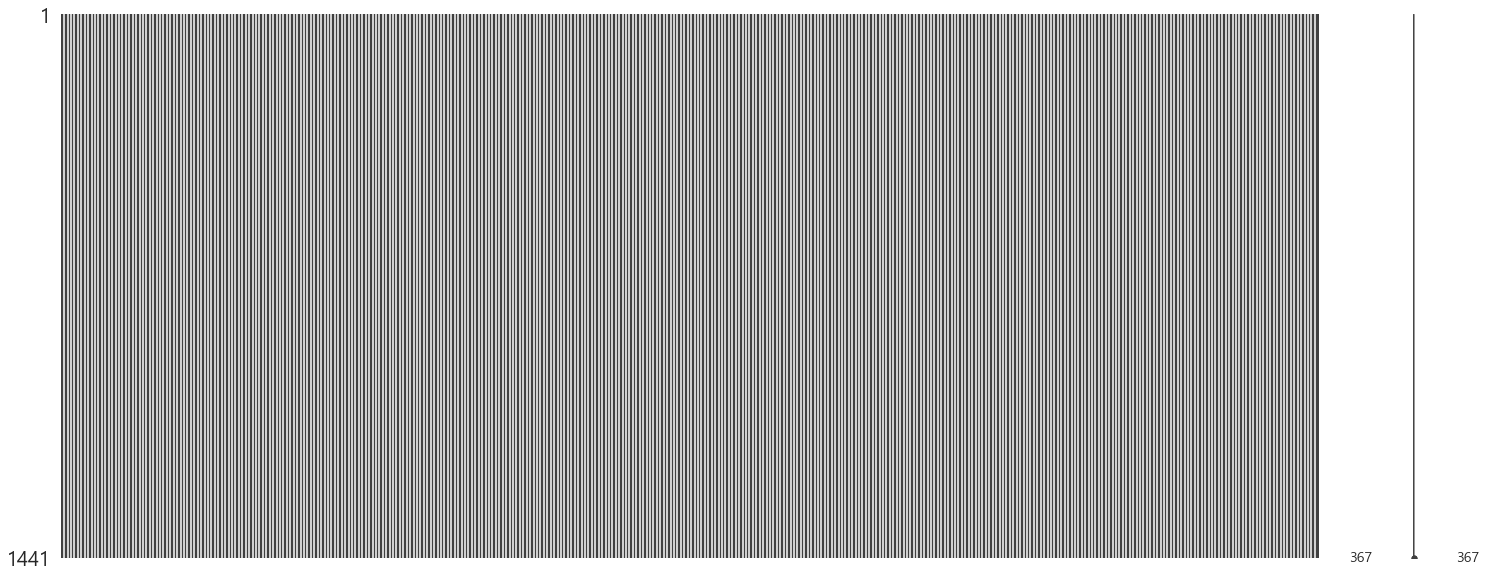

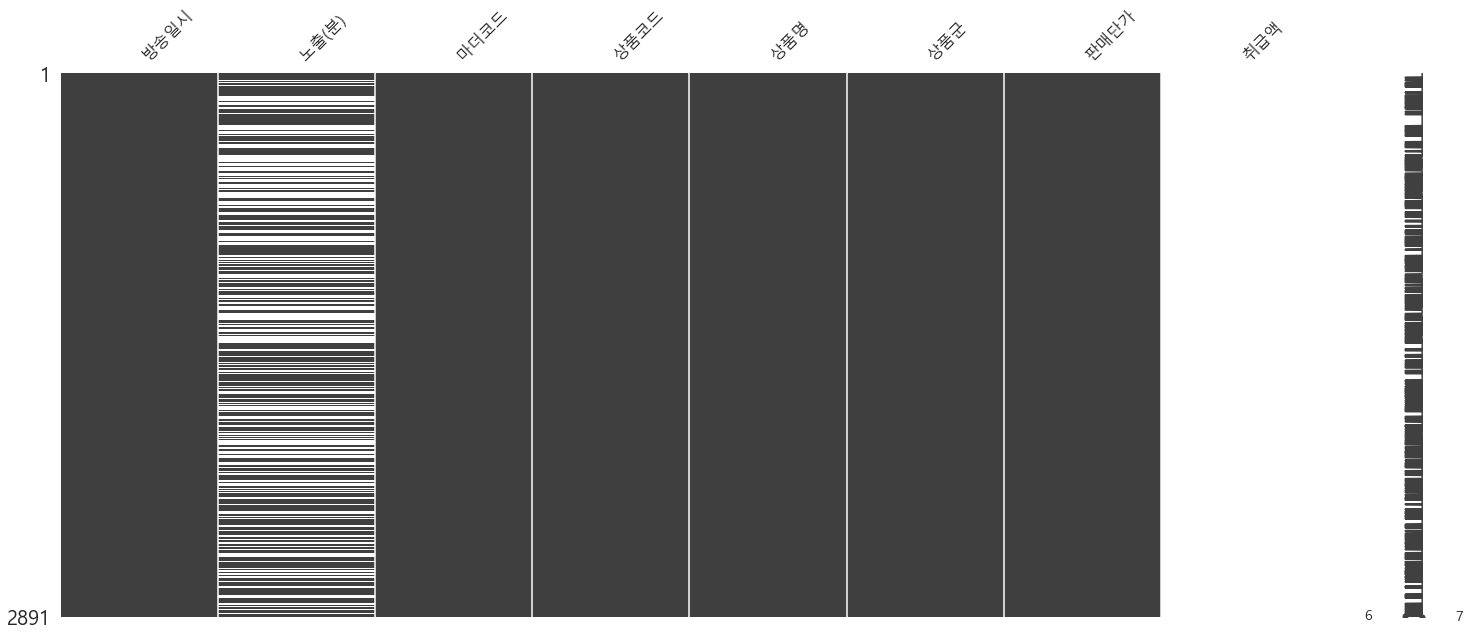

In [3]:
for data in [prfm,rating,test]:
    msno.matrix(data) 

### data info

In [4]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [5]:
rating.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


In [6]:
test.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [7]:
print(prfm.shape, test.shape, rating.shape, sep=", ")

(38309, 8), (2891, 8), (1441, 367)


In [8]:
df.describe()

,노출(분),마더코드,상품코드,판매단가,취급액
count,21525.000000,38309.000000,38309.000000,3.830900e+04,3.737200e+04
mean,20.174664,100390.972148,201219.923334,4.565537e+05,2.187305e+07
std,3.633757,249.927870,735.677344,7.260555e+05,2.019140e+07
min,2.466667,100000.000000,200000.000000,0.000000e+00,5.000000e+04
25%,20.000000,100155.000000,200550.000000,5.900000e+04,6.880750e+06
50%,20.000000,100346.000000,201167.000000,1.090000e+05,1.612950e+07
75%,20.000000,100596.000000,201863.000000,4.990000e+05,3.163125e+07
max,60.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08


In [9]:
test.describe()

,노출(분),마더코드,상품코드,판매단가,취급액
count,1780.000000,2891.000000,2891.000000,2.891000e+03,0.0
mean,20.043530,100388.821169,201200.461778,4.014418e+05,NaN
std,4.573114,256.736363,775.042292,6.046480e+05,NaN
min,5.950000,100003.000000,200003.000000,0.000000e+00,NaN
25%,20.000000,100148.000000,200417.000000,4.090000e+04,NaN
50%,20.000000,100388.000000,201277.000000,7.990000e+04,NaN
75%,20.000000,100593.000000,201818.000000,5.480000e+05,NaN
max,60.000000,100849.000000,202511.000000,4.320000e+06,NaN


In [10]:
rating.describe()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,...,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,0.003681,0.005564,0.001731,0.002658,0.002079,0.002858,0.002703,0.002152,0.002730,0.001947,...,0.010427,0.006006,0.006026,0.006806,0.003879,0.006118,0.004477,0.004576,0.004910,0.004297
std,0.008067,0.012898,0.006213,0.008908,0.007124,0.008478,0.006594,0.006987,0.008164,0.008277,...,0.015119,0.012908,0.012975,0.013342,0.009357,0.012180,0.010604,0.010783,0.013289,0.001512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000
75%,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013000,0.012000,0.002000,0.010000,0.000000,0.007000,0.000000,0.000000,0.000000,0.005000
max,0.069000,0.073000,0.073000,0.059000,0.070000,0.081000,0.039000,0.078000,0.049000,0.089000,...,0.077000,0.118000,0.095000,0.108000,0.080000,0.093000,0.075000,0.069000,0.108000,0.008000


__데이터가 잘 불러와졌음을 확인<br/>  prfm, test 데이터에 각각 노출(분)에 대한 결측치 존재하고, 취급액에 대한 결측치 존재<br/>  
test 데이터에서 취급액은 예측해야 할 대상이므로 상관 무<br/>  rating 데이터는 0이 굉장히 많은 sparse한 데이터이므로 어떻게 처리할지 충분히 고민해봐야 함__

------------------------------------
__sparse한 rating 데이터 활용 방안 고려<br/>  취급액이 존재하지 않는 prfm 데이터 제거<br/>  노출(분)을 어떻게 처리할지에 대한 고민__

## simple preprocessing

### 취급액이 없는 경우 제거

In [5]:
df2 = df.dropna(subset=['취급액'])

In [10]:
df3 = df2[df2["판매단가"] <= df2["취급액"]]

In [6]:
df.shape, df2.shape

((38309, 8), (37372, 8))

In [34]:
all_df = pd.concat([df3, test])

# test 데이터는 취급액,주문량을 -1로 분류
all_df["취급액"].fillna(value=-1, inplace=True)


In [35]:
all_df["취급액"].value_counts()

-1.0           2891
 6513000.0       24
 7184000.0       18
 6967000.0       17
 3109000.0       17
               ... 
 8900000.0        1
 2030000.0        1
 620000.0         1
 41259000.0       1
 19907000.0       1
Name: 취급액, Length: 24141, dtype: int64

### 주문량 구하기

In [9]:
df2["주문량"] = df2["취급액"] / df2["판매단가"]

<ipython-input-9-8aff1a0c4b8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["주문량"] = df2["취급액"] / df2["판매단가"]


### 방송일시 분할

In [15]:
df3["연"] = prfm["방송일시"].dt.year
df3["월"] = prfm["방송일시"].dt.month
df3["일"] = prfm["방송일시"].dt.day
df3["시간"] = prfm["방송일시"].dt.hour
df3["분"] = prfm["방송일시"].dt.minute
df3["요일"] = prfm["방송일시"].dt.weekday

<ipython-input-15-c577d812e0a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["연"] = prfm["방송일시"].dt.year
<ipython-input-15-c577d812e0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["월"] = prfm["방송일시"].dt.month
<ipython-input-15-c577d812e0a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [36]:
all_df["연"] = all_df["방송일시"].dt.year
all_df["월"] = all_df["방송일시"].dt.month
all_df["일"] = all_df["방송일시"].dt.day
all_df["시간"] = all_df["방송일시"].dt.hour
all_df["분"] = all_df["방송일시"].dt.minute
all_df["요일"] = all_df["방송일시"].dt.weekday

### 노출 NA imputation 기준: 같은 방송일시의 노출 시간

In [16]:
df3["노출(분)"] = df3["노출(분)"].fillna(method='ffill')                                                                    

<ipython-input-16-4d2d816dfa62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["노출(분)"] = df3["노출(분)"].fillna(method='ffill')


In [37]:
all_df["노출(분)"] = all_df["노출(분)"].fillna(method='ffill')                                                                    

## visualization

### Train 

#### 상품군별 분포

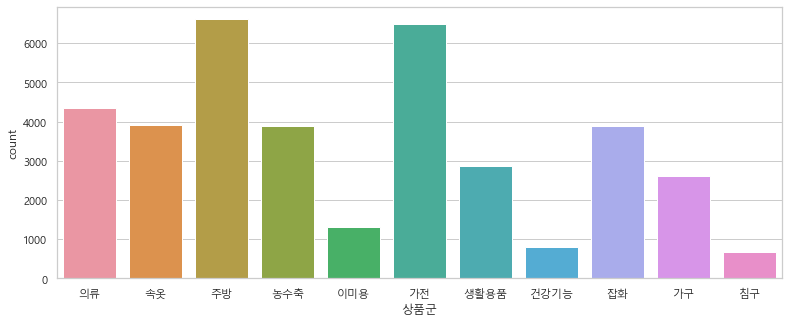

In [17]:
plt.figure(figsize=(13,5))
sns.countplot(x="상품군", data=df2)

__주방, 가전상품군 방송 횟수 다수<br/> 의외로 농수축은 방송 횟수가 그리 높지 않음__ 

In [18]:
prfm_tmp = df3.groupby("상품코드")['주문량'].sum().reset_index()

prfm_tmp2 = prfm_tmp.sort_values(by="주문량",ascending=False).reset_index().iloc[:10,:]

prfm_tmp3 = pd.merge(prfm_tmp2, df3[df3["상품코드"].isin(set(prfm_tmp2["상품코드"]))][["상품코드","상품명"]], on="상품코드",how="left")

#### 상품코드별 주문량 상위 10개

In [19]:
df3['주문량'].mean()

314.7707483014743

In [20]:
prfm_tmp3.head()

,index,상품코드,주문량,상품명
0,709,200864,465758.867314,안동간고등어 20팩
1,709,200864,465758.867314,안동간고등어 20팩
2,709,200864,465758.867314,안동간고등어 20팩
3,709,200864,465758.867314,안동간고등어 20팩
4,709,200864,465758.867314,안동간고등어 20팩


[Text(0, 0, 'AAB의 소곱창전골 800g x 8팩'),
 Text(0, 0, '비버리힐스폴로클럽 남성기초세트(2018FW골드)'),
 Text(0, 0, '비버리힐스폴로클럽 남성기초세트(골드+콜라겐)'),
 Text(0, 0, '에코라믹 통주물 스톤 냄비세트'),
 Text(0, 0, '유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)'),
 Text(0, 0, '임성근의 녹용도가니탕 풀세트'),
 Text(0, 0, '안동간고등어 20팩'),
 Text(0, 0, '국내산 손질갑오징어 8팩'),
 Text(0, 0, '옛날 그 쥐포 110장 (11팩)'),
 Text(0, 0, '멋진밥상 흥양농협 쌀 20kg')]

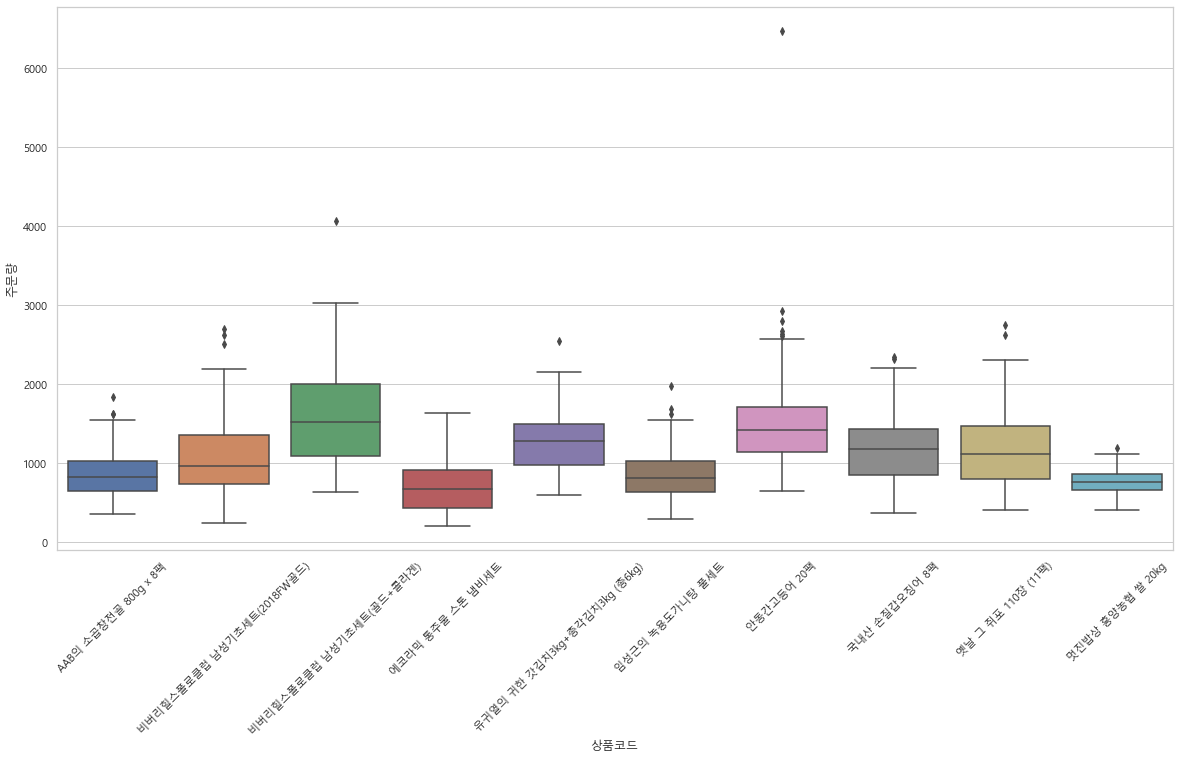

In [21]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="상품코드", y="주문량", data=df3[df3["상품코드"].isin(set(prfm_tmp3["상품코드"]))])
ax.set_xticklabels(df3[df3["상품코드"].isin(set(prfm_tmp3["상품코드"]))].sort_values(by="상품코드")["상품명"].unique(), rotation=45)

취급액 순위<br/>
1. 안동간고등어 20팩<br/>
2. AAB의 소곱창전골 800g x 8팩<br/>
3. 한일 대용량 스텐 분쇄믹서기<br/>
4. 국내산 손질갑오징어 8팩<br/>
5. 에코라믹 통주물 스톤 냄비세트



주문량 순위<br/>
1. 안동간고등어 20팩<br/>
2. AAB의 소곱창전골 800g x 8팩<br/>  
3. 국내산 손질갑오징어 8팩<br/>
4. 비버리힐스폴로클럽 남성기초세트(2018FW골드)<br/>
5. 비버리힐스폴로클럽 남성기초세트(골드+콜라겐)

-----------
__농수산물, 주방이 취급액이 높은 것으로 확인<br/> 농수축 방송 횟수 순위가 높지 않았음에도 불구하고 주문량 분포는 높음을 알 수 있음<br/>이미용은 방송 횟수가 낮은 편인데 비버리힐스폴로클럽..?은 순위권에 2개나 존재__

#### 월별 주문량

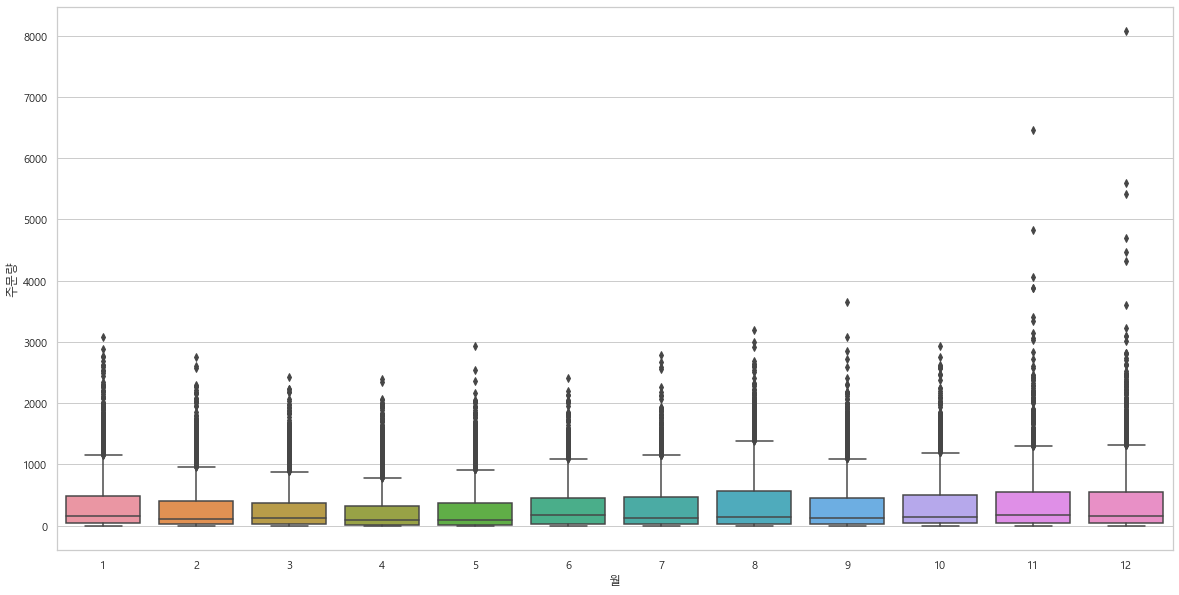

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x="월",y="주문량",data=df3, )

#### 일별 주문량

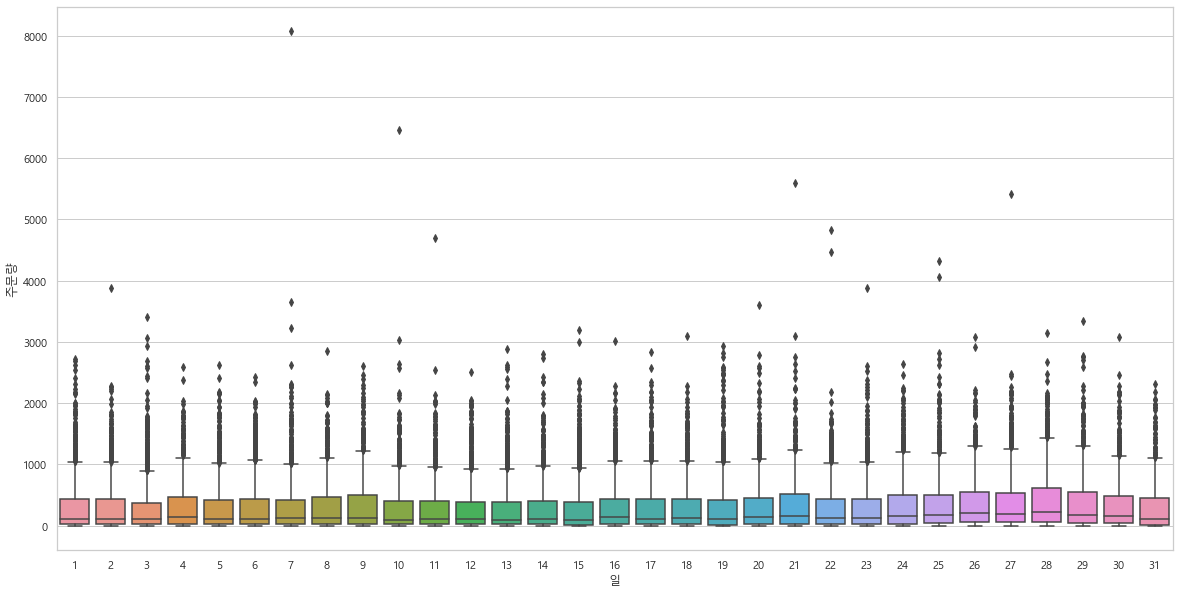

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x="일", y="주문량", data=df3, )

__일별로 거의 차이가 없는 주문량 분포__

#### 시간별 주문량

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df3)

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df3)

__16,17,18시가 가장 활발한 주문 시간<br/> 21,22시는 주문이 가장 적음__

#### 요일별 주문량

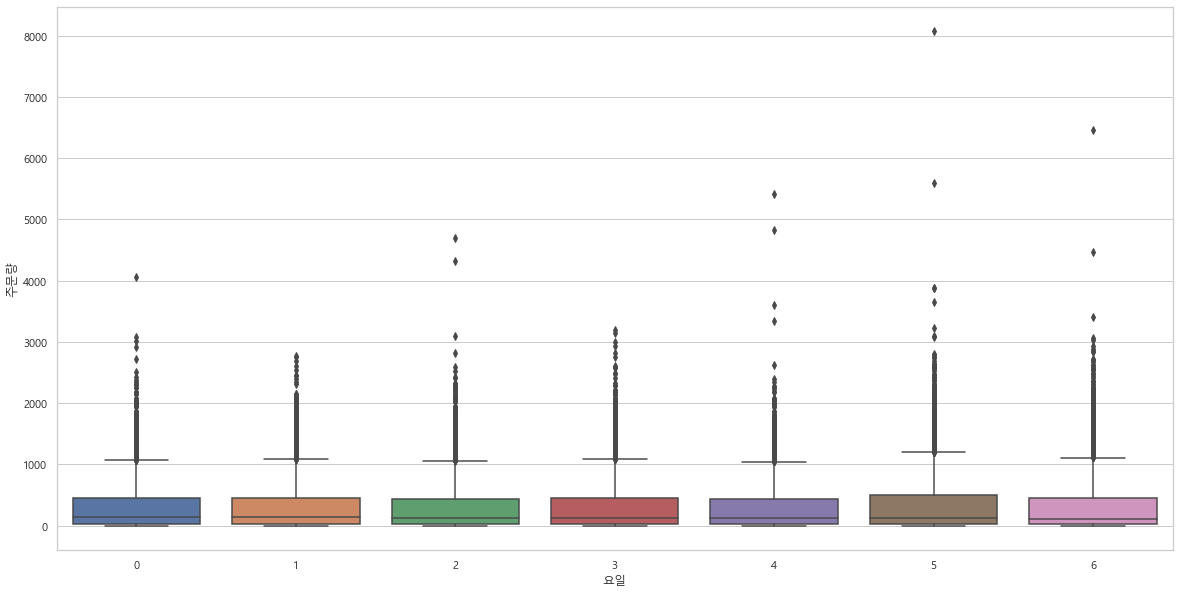

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x="요일",y="주문량",data=df3)

__요일별로 거의 차이가 없는 주문량 분포__

In [26]:
df3_tmp = df3.groupby("방송일시")["주문량"].sum().reset_index()
df3_tmp2 = df3.groupby("방송일시")["취급액"].sum().reset_index()

<Figure size 7200x2160 with 0 Axes>

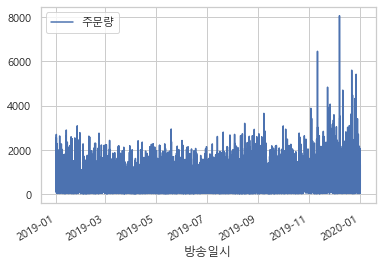

In [27]:
plt.figure(figsize=(100,30))
df3_tmp.set_index(keys="방송일시").plot()

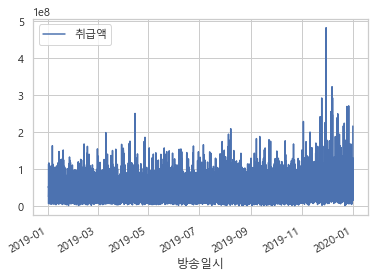

In [28]:
df3_tmp2.set_index(keys="방송일시").plot()

__2020년대 초에 주문량이 상승한 추세 --> why?__

#### 상품군별 판매단가에 따라서 주문량이 어떻게 달라질까?

1. 판매단가를 100원 단위에서 반올림해서 사용하자.

In [29]:
df4 = df3.copy()

In [30]:
df4["판매단가"] = np.round(df3["판매단가"],-3)

In [38]:
all_df["판매단가_100"] = np.round(all_df["판매단가"], -3)

2. 상품군별 판매단가 분포 확인

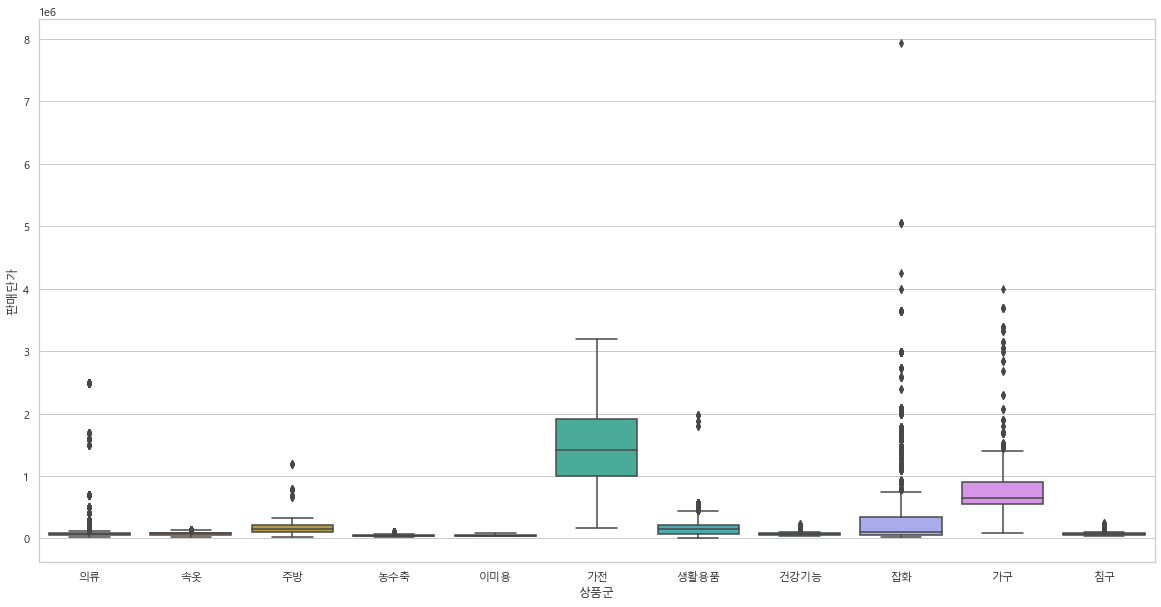

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군",y="판매단가", data=df4)

3. 상품군별로 판매단가와 주문량의 상관관계 분석 

In [32]:
corr_a_d = lambda x: x["판매단가"].corr(x["주문량"])

grouped = df4.groupby("상품군")

pd.DataFrame(grouped.apply(corr_a_d)).reset_index()

,상품군,0
0,가구,-0.325229
1,가전,-0.485398
2,건강기능,-0.480572
3,농수축,-0.360070
4,생활용품,-0.339469
5,속옷,-0.283000
6,의류,-0.243958
7,이미용,-0.452696
8,잡화,-0.355373
9,주방,-0.543396


In [33]:
corr_a_d = lambda x: x["판매단가"].corr(x["취급액"])

grouped = df4.groupby("상품군")

pd.DataFrame(grouped.apply(corr_a_d)).reset_index()

,상품군,0
0,가구,-0.079289
1,가전,-0.126377
2,건강기능,-0.280878
3,농수축,0.086484
4,생활용품,-0.037218
5,속옷,0.199794
6,의류,0.153504
7,이미용,-0.196752
8,잡화,-0.083183
9,주방,-0.316092


In [34]:
grouped2 = df4.groupby(["상품군","상품코드"])[["상품군","상품코드","주문량","방송일시","판매단가"]]

등장 순서에 따라 번호 매기기

In [35]:
df5 = df4.copy()
df5["방송 순서"] = df4.groupby(["연","월","일","상품명"])["상품코드"].rank(method="first")

In [39]:
all_df["일별방송순서"] = all_df.groupby(["연","월","일","상품명"])["상품코드"].rank(method="first")
all_df["월별방송순서"] = all_df.groupby(["연","월","상품명"])["상품코드"].rank(method="first")

In [41]:
all_df.tail()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,연,월,일,시간,분,요일,판매단가_100,일별방송순서,월별방송순서
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,-1.0,NaN,2020,7,1,0,20,2,0,1.0,1.0
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,-1.0,NaN,2020,7,1,0,40,2,0,2.0,2.0
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,-1.0,NaN,2020,7,1,1,0,2,0,3.0,3.0
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,-1.0,NaN,2020,7,1,1,20,2,70000,1.0,1.0
2890,2020-07-01 01:40:00,15.933333,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,-1.0,NaN,2020,7,1,1,40,2,70000,2.0,2.0


In [22]:
all_df["일별방송순서"].value_counts()

1.0     13561
2.0     12846
3.0     10714
4.0       502
5.0       297
6.0       272
7.0        27
8.0        25
9.0        18
10.0        5
11.0        3
12.0        3
Name: 일별방송순서, dtype: int64

#### 방송순서에 따른 주문량

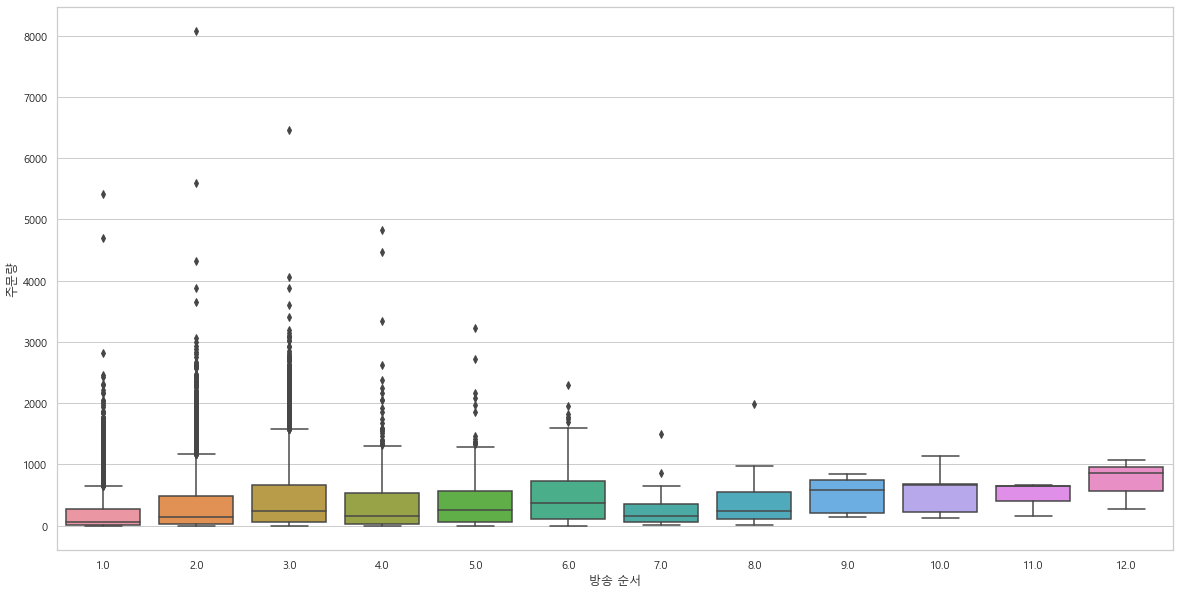

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x="방송 순서", y="주문량", data=df5)

#### 상품 카테고리별 노출(분)에 따른 주문량 분포

노출 시간 반올림해주기

In [38]:
df5["노출_5"] = df5["노출(분)"].apply(lambda x: round(x/5)*5)
df5["노출_10"] = df5["노출(분)"].apply(lambda x: round(x,-1))

In [42]:
all_df["노출_5"] = all_df["노출(분)"].apply(lambda x: round(x/5)*5)
all_df["노출_10"] = all_df["노출(분)"].apply(lambda x: round(x,-1))

In [43]:
all_df["취급액"].value_counts()

-1.0           2891
 6513000.0       24
 7184000.0       18
 6967000.0       17
 3109000.0       17
               ... 
 8900000.0        1
 2030000.0        1
 620000.0         1
 41259000.0       1
 19907000.0       1
Name: 취급액, Length: 24141, dtype: int64

In [24]:
all_df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,연,월,일,시간,분,요일,판매단가_100,일별방송순서,월별방송순서,노출_5,노출_10
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,2019,1,1,6,0,1,40000,1.0,1.0,20,20.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,2019,1,1,6,0,1,40000,1.0,1.0,20,20.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,2019,1,1,6,20,1,40000,2.0,2.0,20,20.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,2019,1,1,6,20,1,40000,2.0,2.0,20,20.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,2019,1,1,6,40,1,40000,3.0,3.0,20,20.0


In [39]:
df5["노출_5"].value_counts()

20    31370
30     2367
10      816
15      779
25       27
5        20
40        2
0         1
Name: 노출_5, dtype: int64

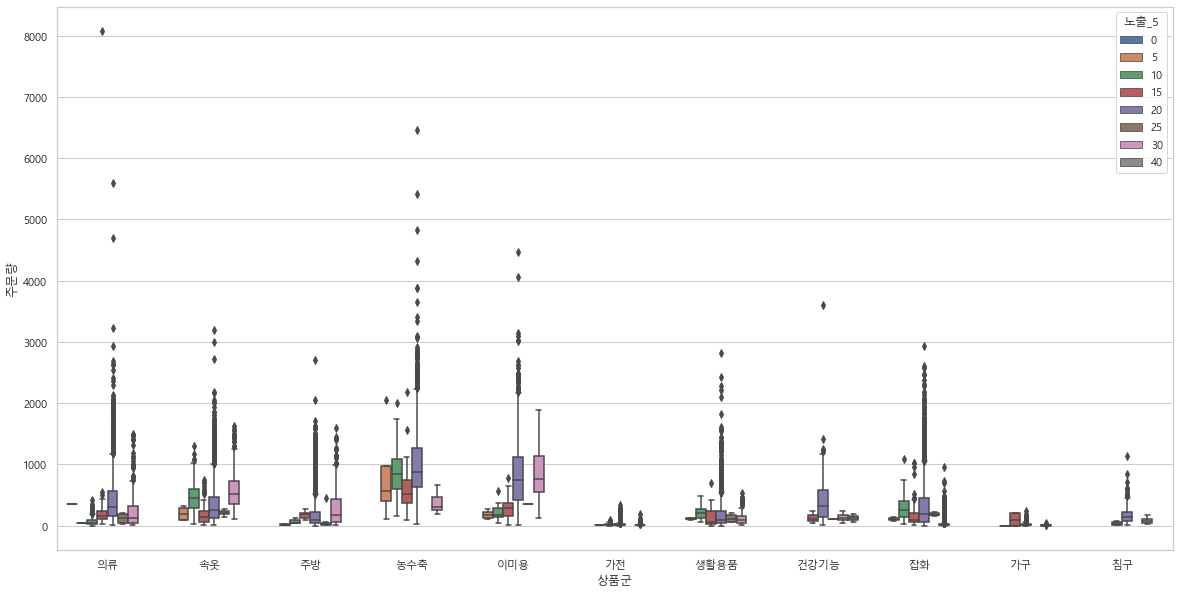

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군", y="주문량", hue="노출_5",data=df5)

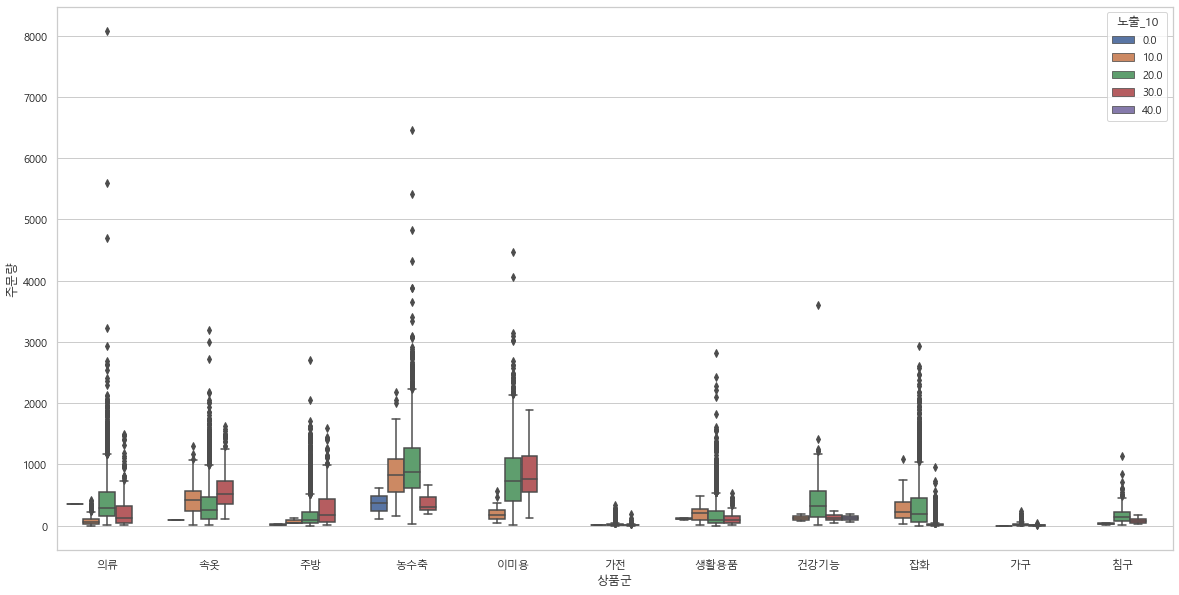

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군", y="주문량", hue="노출_10",data=df5)

In [42]:
df5["상품군"].unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

plt.figure(figsize=(20,10))

fig, axes = plt.subplots(2,6, figsize=(20,10))


ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "의류"],
                ax = axes[0,0])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "속옷"],
                ax = axes[0,1])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "주방"],
                ax = axes[0,2])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "농수축"],
                ax = axes[0,3])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "이미용"],
                ax = axes[0,4])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "가전"],
                ax = axes[0,5])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "생활용품"],
                ax = axes[1,0])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "건강기능"],
                ax = axes[1,1])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "잡화"],
                ax = axes[1,2])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "가구"],
                ax = axes[1,3])
ax = sns.boxplot(x="시간", y="주문량", hue="노출_10", data=df5[df5["상품군"] == "침구"],
                ax = axes[1,4])

In [43]:
df5["계절"] = df5["월"].map({3:"봄",4:"봄",5:"봄",6:"여름",7:"여름",8:"여름",9:"가을",10:"가을",11:"가을",12:"겨울",1:"겨울",2:"겨울"})

In [44]:
all_df["계절"] = all_df["월"].map({3:"봄",4:"봄",5:"봄",6:"여름",7:"여름",8:"여름",9:"가을",10:"가을",11:"가을",12:"겨울",1:"겨울",2:"겨울"})

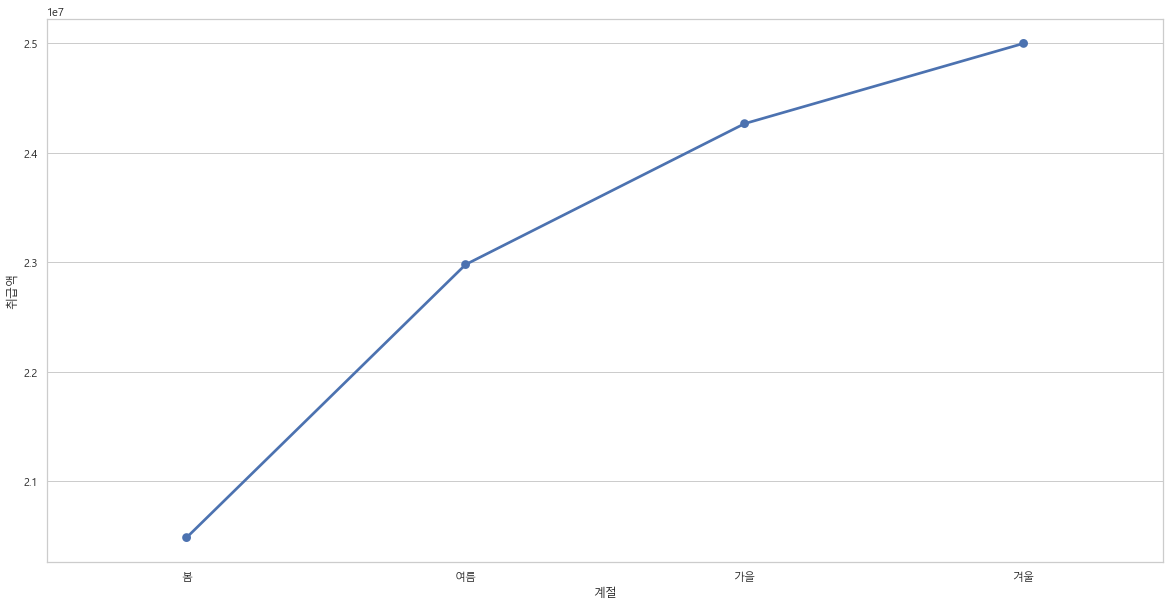

In [44]:
plt.figure(figsize=(20,10))
sns.pointplot(x="계절", y="취급액", data=df5.groupby("계절")["취급액"].mean().reset_index(), order=["봄","여름","가을","겨울"])

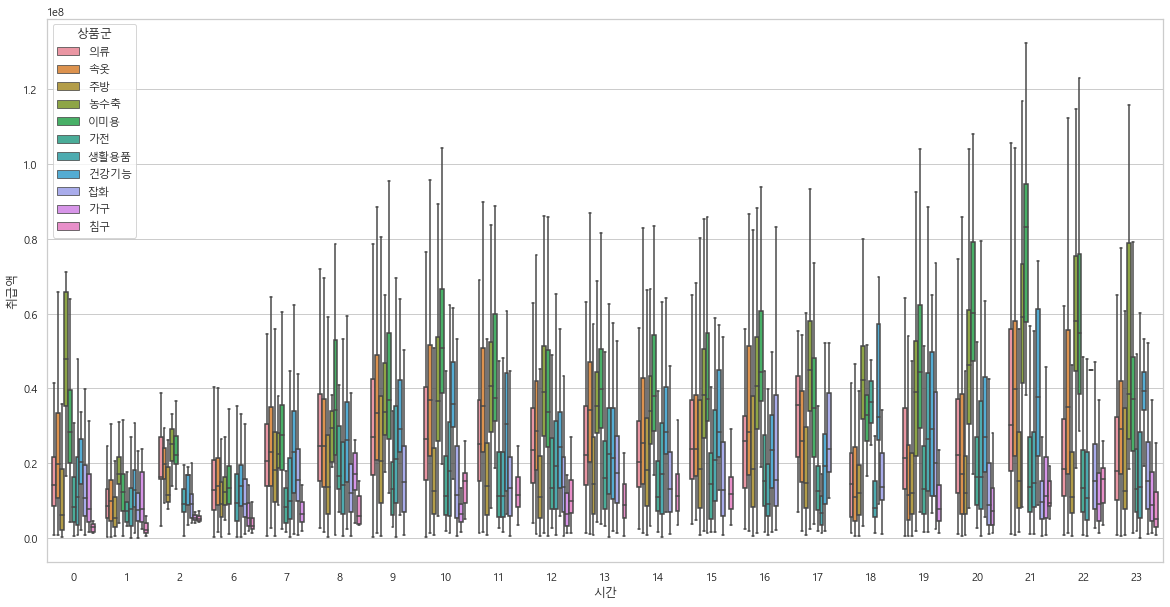

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="취급액", hue="상품군", data=df5, showfliers = False)

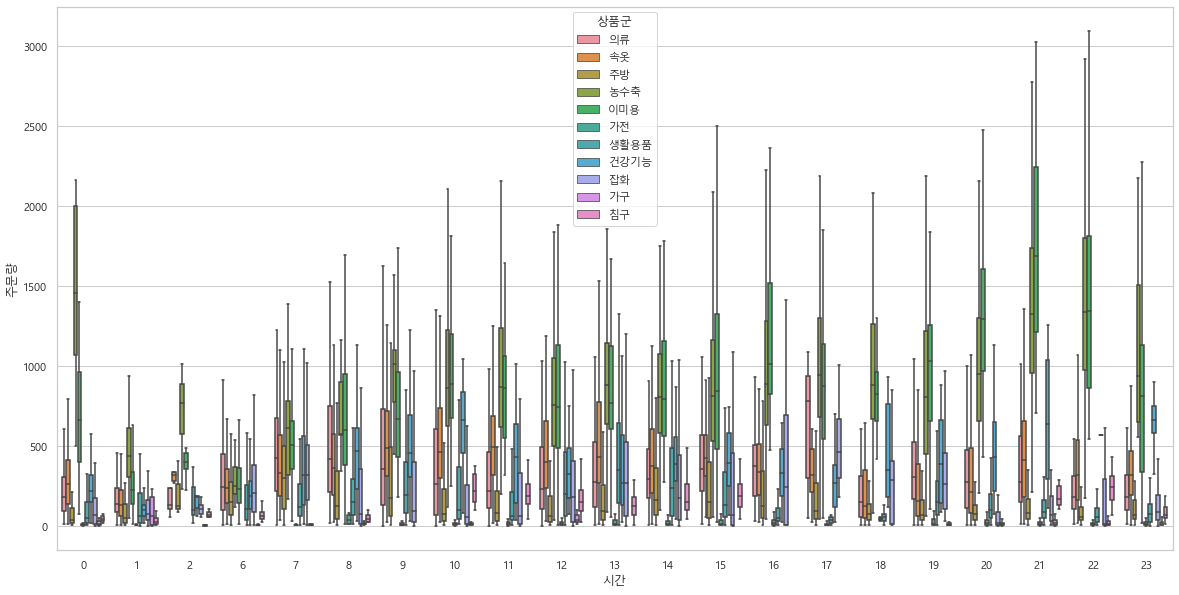

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", hue="상품군", data=df5, showfliers = False)

시즌별 취급액 변화 확인<br/>
시간별 상품군별 취급액 확인

##### 의류

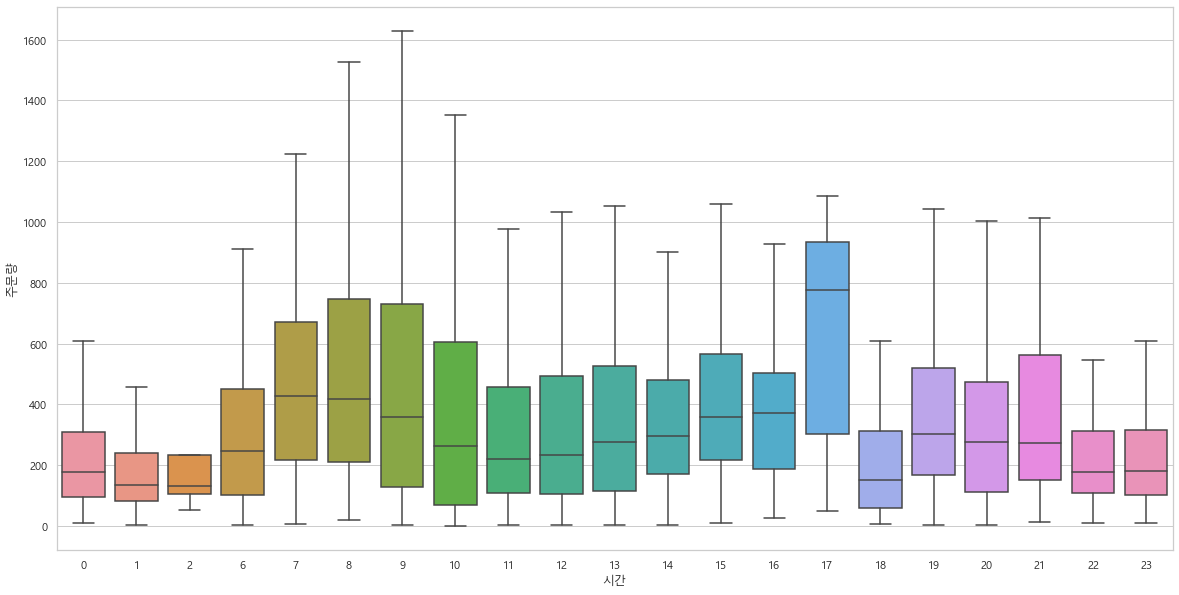

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "의류"], showfliers = False)

##### 속옷

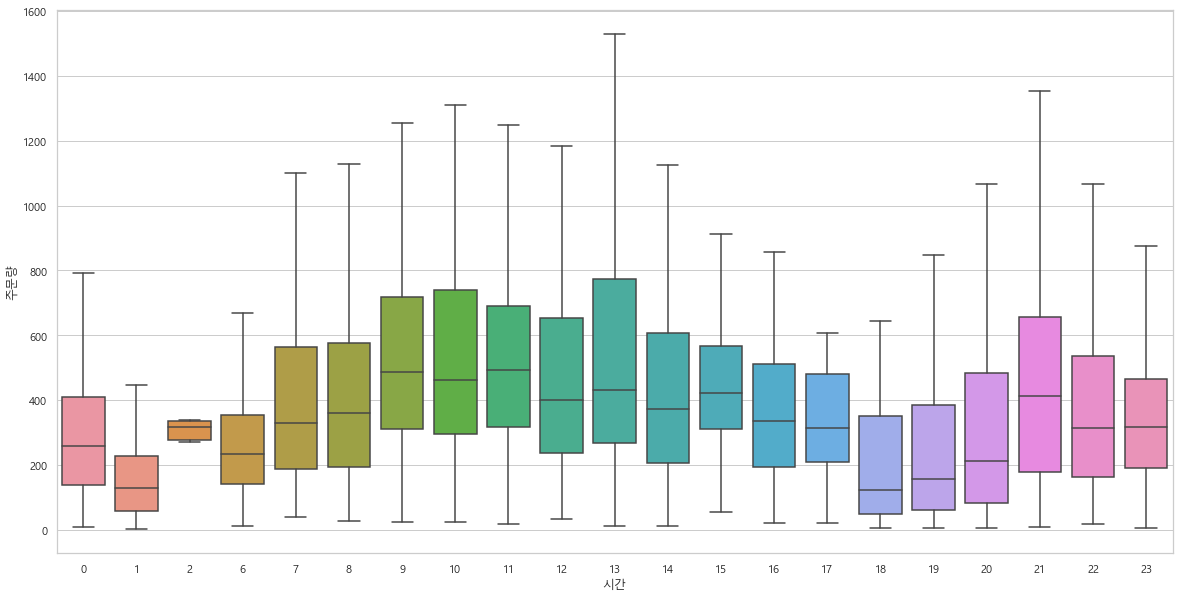

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "속옷"], showfliers = False)

##### 주방

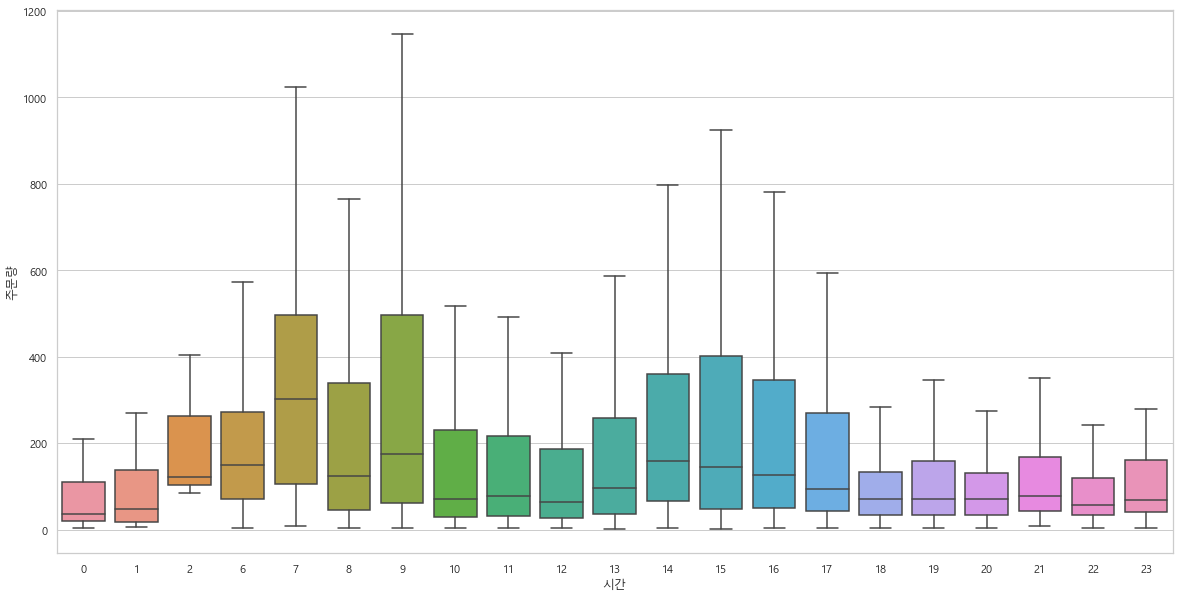

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "주방"], showfliers = False)

##### 농수축

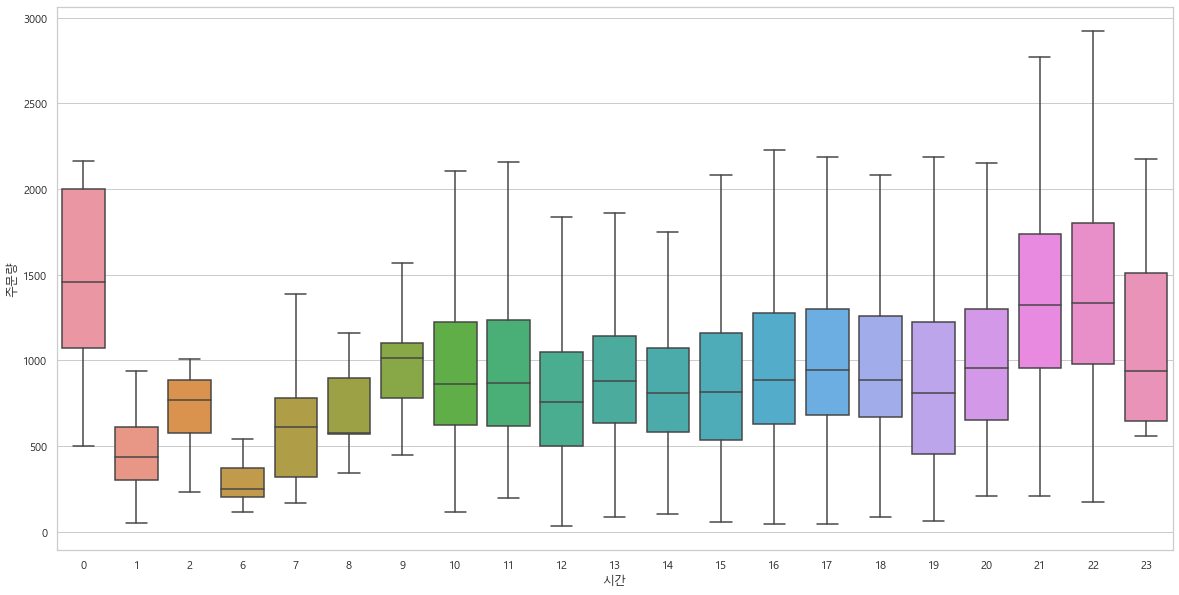

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "농수축"], showfliers = False)

##### 이미용

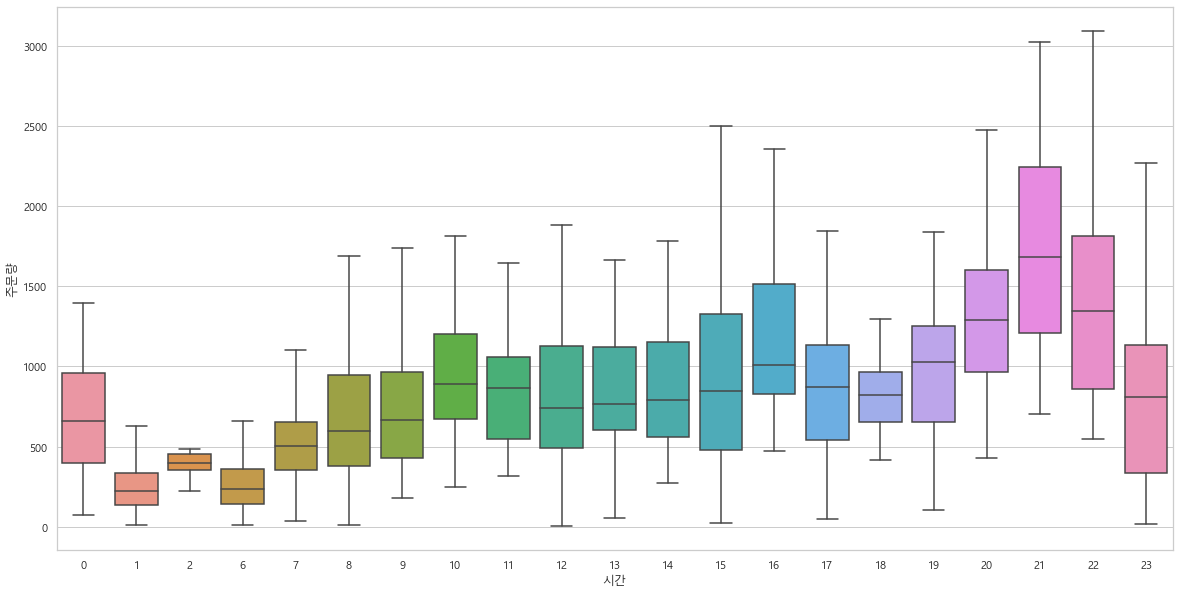

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "이미용"], showfliers = False)

##### 가전

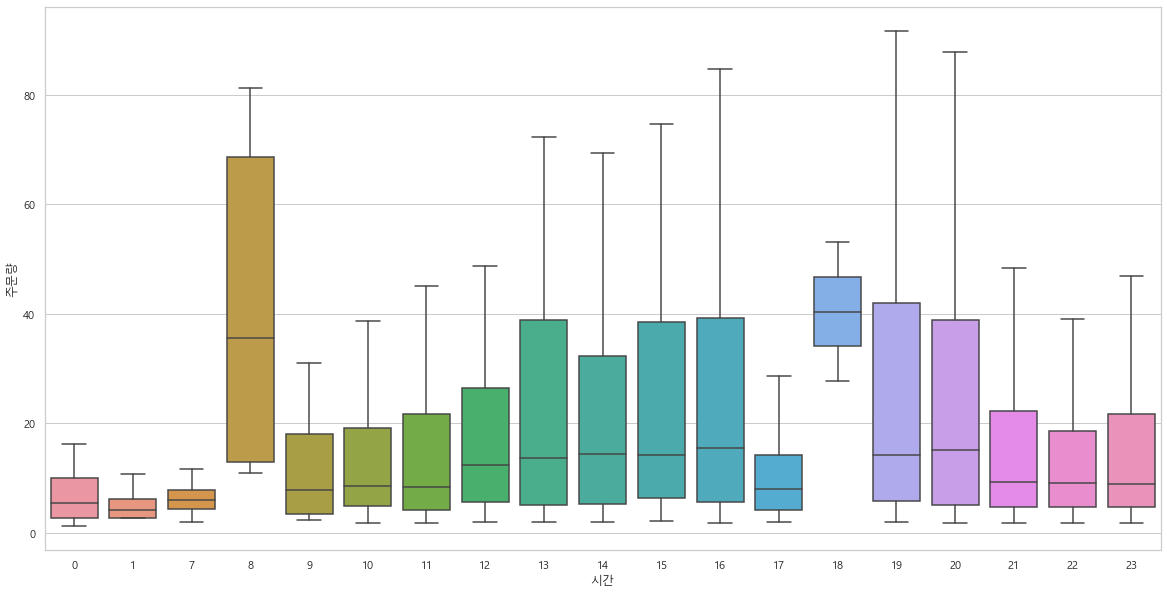

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "가전"], showfliers = False)

##### 생활용품

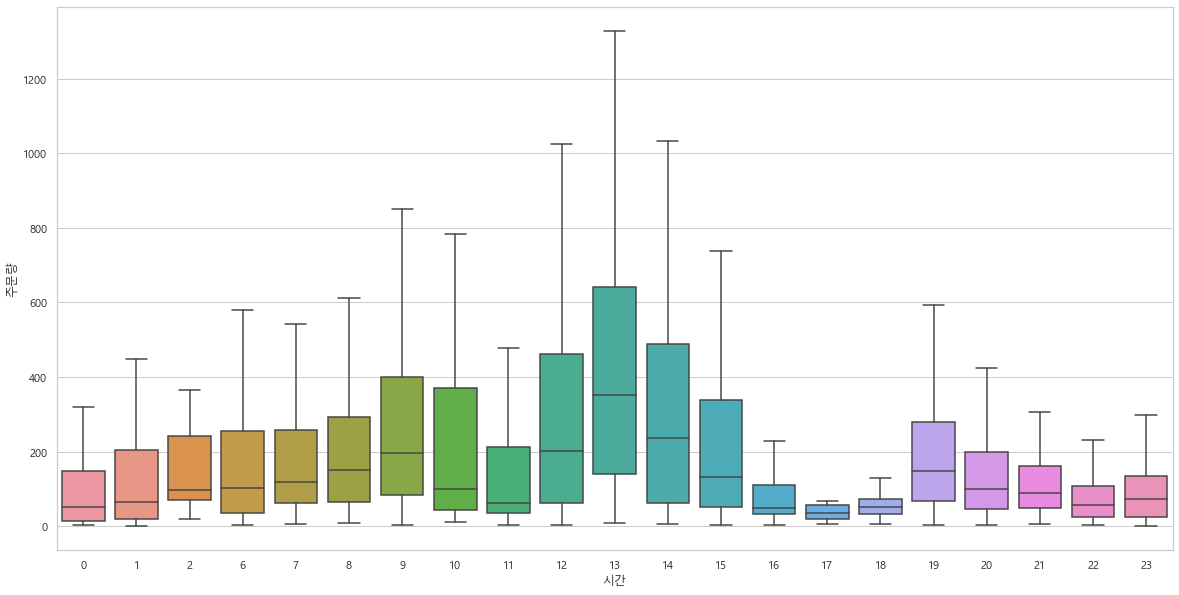

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "생활용품"], showfliers = False)

###### 건강기능

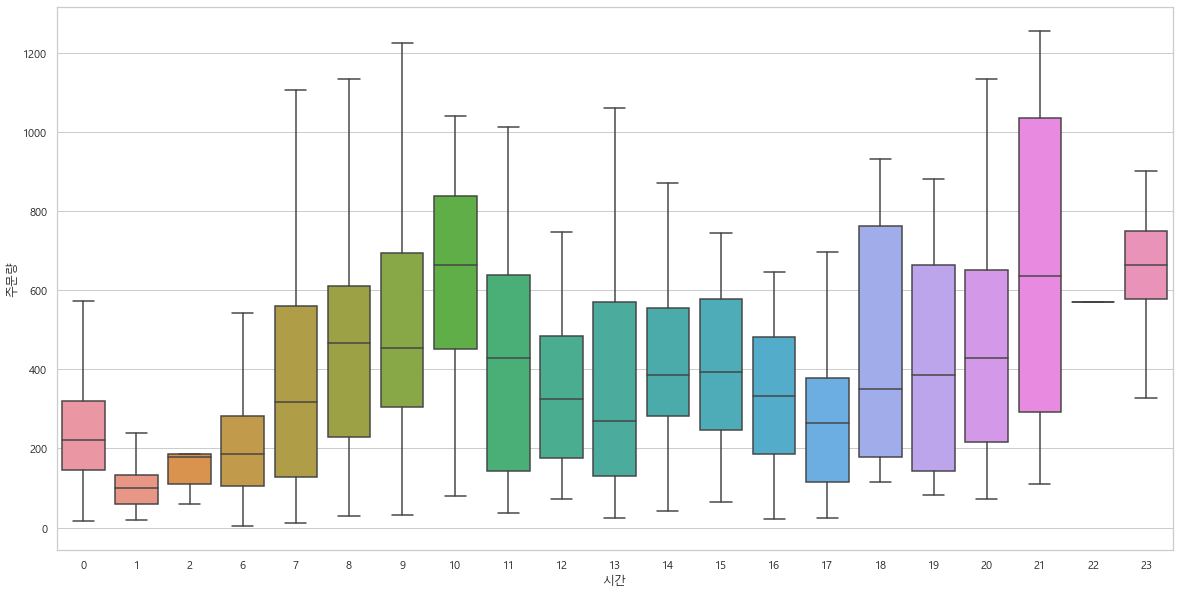

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "건강기능"], showfliers = False)

##### 잡화

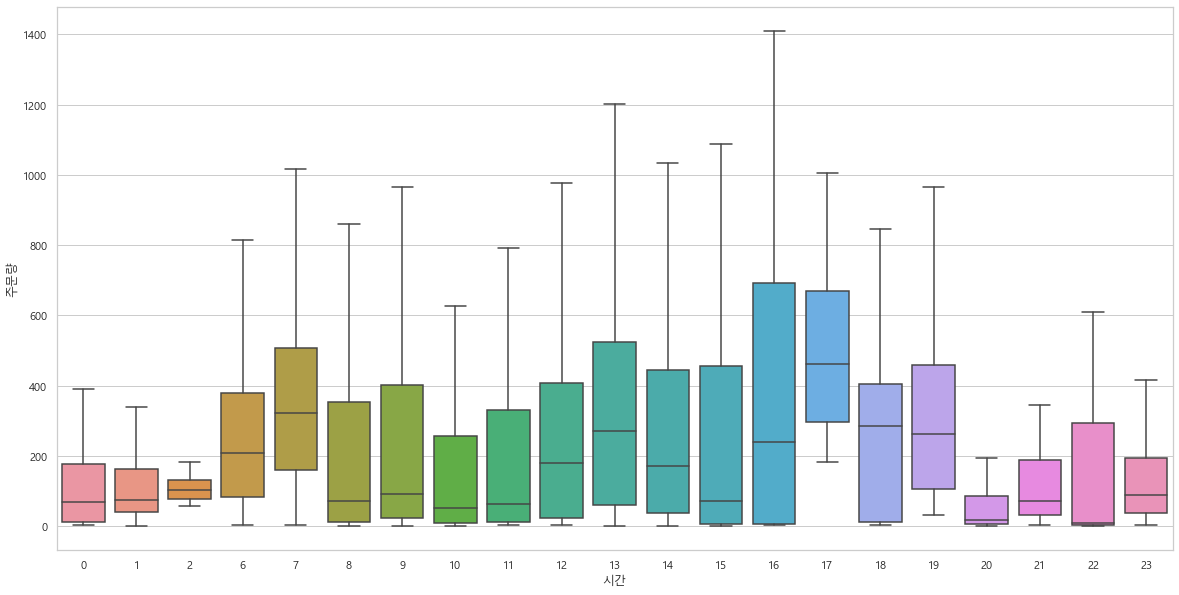

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "잡화"], showfliers = False)

##### 가구

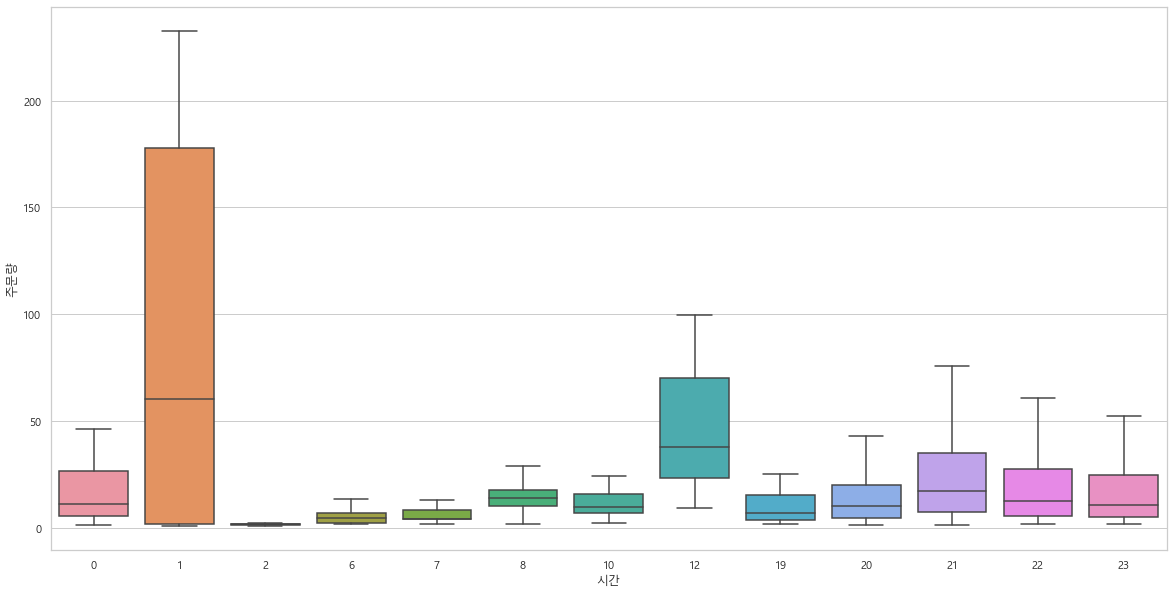

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "가구"], showfliers = False)

##### 침구

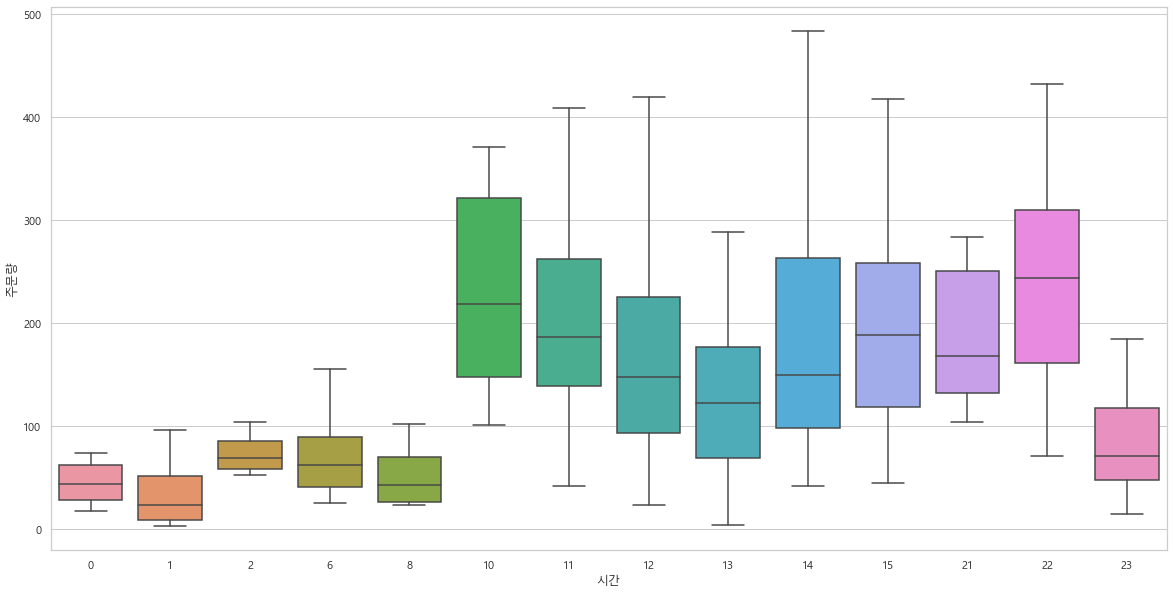

In [57]:
plt.figure(figsize=(20,10))
sns.boxplot(x="시간", y="주문량", data=df5.loc[lambda x:x.상품군 == "침구"], showfliers = False)

### Test

#### 분석에 맞지 않는 데이터 제거

In [58]:
df_test = test.copy()

상품군이 무형인 데이터 제거

In [59]:
df_test = df_test[df_test["상품군"] != "무형"]

In [45]:
all_df = all_df[all_df["상품군"] != "무형"]

In [46]:
all_df["취급액"].value_counts()

-1.0           2716
 6513000.0       24
 7184000.0       18
 6967000.0       17
 3109000.0       17
               ... 
 8900000.0        1
 2030000.0        1
 620000.0         1
 41259000.0       1
 19907000.0       1
Name: 취급액, Length: 24141, dtype: int64

판매단가가 0인 데이터 => 없음

In [60]:
df_test[df_test["판매단가"] == 0]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액


In [61]:
df_test["연"] = test["방송일시"].dt.year
df_test["월"] = test["방송일시"].dt.month
df_test["일"] = test["방송일시"].dt.day
df_test["시간"] = test["방송일시"].dt.hour
df_test["분"] = test["방송일시"].dt.minute
df_test["요일"] = test["방송일시"].dt.weekday

In [62]:
df_test.shape, test.shape

((2716, 14), (2891, 8))

대략 175개 데이터 제거

#### 상품군별 분포

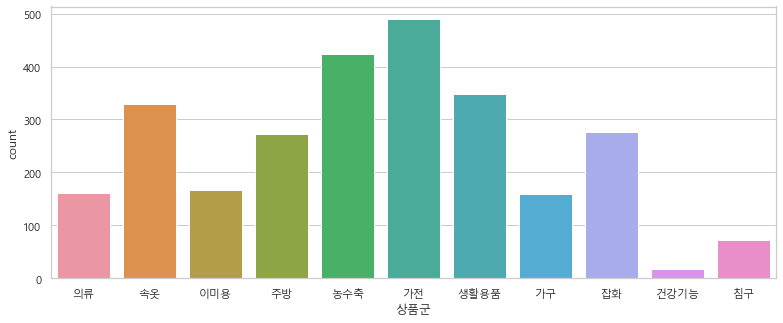

In [63]:
plt.figure(figsize=(13,5))
sns.countplot(x="상품군", data=df_test)

__train: 주방, 가전상품군 방송 횟수 다수<br/> 의외로 농수축은 방송 횟수가 그리 높지 않음<br/>
test: 가전 > 농수축 > 생활용품 > 속옷 순<br/> 주방은 높지 않음__ 

#### 상품군별 판매단가 분포

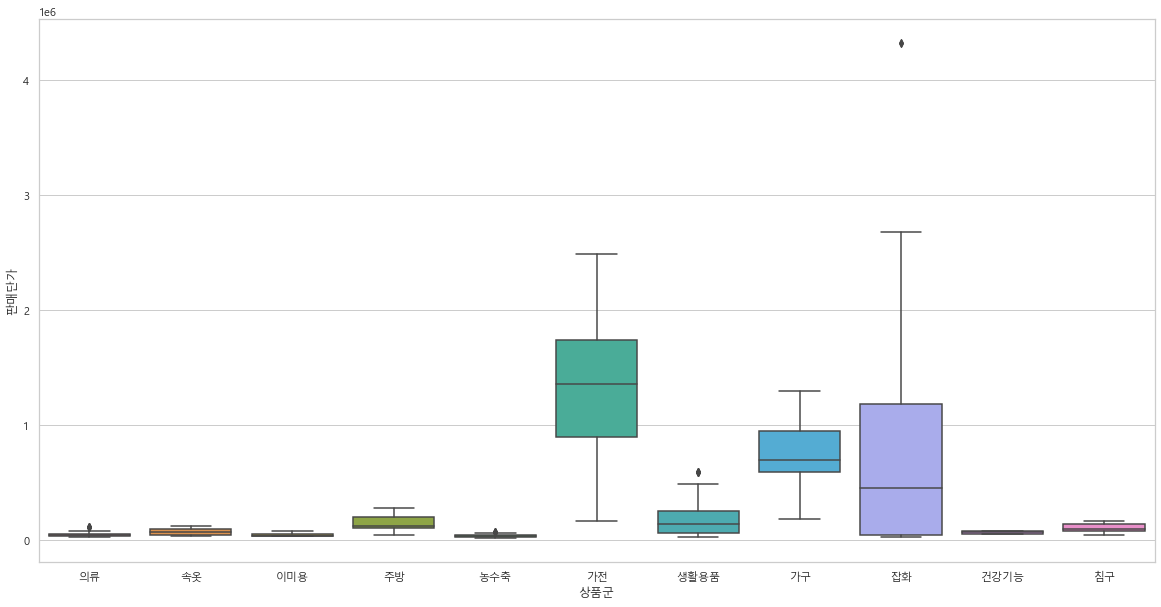

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(x="상품군",y="판매단가", data=df_test)

### rating

In [65]:
pd.set_option("display.max_columns", 500)

In [66]:
rating.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,2019-04-07,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,2019-06-06,2019-06-07,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-03,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-11,2019-07-12,2019-07-13,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-30,2019-07-31,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01,2019-09-02,2019-09-03,2019-09-04,2019-09-05,2019-09-06,2019-09-07,2019-09-08,2019-09-09,2019-09-10,2019-09-11,2019-09-12,2019-09-13,2019-09-14,2019-09-15,2019-09-16,2019-09-17,2019-09-18,2019-09-19,2019-09-20,2019-09-21,2019-09-22,2019-09-23,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-12,2019-10-13,2019-10-14,2019-10-15,2019-10-16,2019-10-17,2019-10-18,2019-10-19,2019-10-20,2019-10-21,2019-10-22,2019-10-23,2019-10-24,2019-10-25,2019-10-26,2019-10-27,2019-10-28,2019-10-29,2019-10-30,2019-10-31,2019-11-01,2019-11-02,2019-11-03,2019-11-04,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11,2019-11-12,2019-11-13,2019-11-14,2019-11-15,2019-11-16,2019-11-17,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,20

In [117]:
df5.to_csv("../../data/pre/preprocessed1.csv", index=False)

## Preprocessing

### 상품명 분리

In [67]:
wo = pd.read_csv("../../data/pre/품사2.csv")

In [68]:
wo.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,품사
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,"[('테이트', 'NNP'), ('남성', 'NNG'), ('셀린', 'NNP'),..."
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,"[('테이트', 'NNP'), ('여성', 'NNG'), ('셀린', 'NNP'),..."
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,"[('테이트', 'NNP'), ('남성', 'NNG'), ('셀린', 'NNP'),..."
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,"[('테이트', 'NNP'), ('여성', 'NNG'), ('셀린', 'NNP'),..."
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,"[('테이트', 'NNP'), ('남성', 'NNG'), ('셀린', 'NNP'),..."


In [69]:
# 첫번째 어구 추출
## 브랜드일 가능성 높음
## 브랜드가 아닌 단어 제거
first_words = []
words = wo["품사"].apply(lambda x:x.split(','))

first_words = words.apply(lambda x:x[0][2:])    

mecab 사전으로 분류하고 브랜드 추출하는 게 오히려 복잡한 것 같다... 

In [71]:
import re

splitted_words = df5["상품명"].apply(lambda x:x.split(' '))
words_df = pd.DataFrame(word for word in splitted_words)
words_df.iloc[:,0] = words_df.iloc[:,0].apply(lambda x:re.sub('[()]','',x))
words_df.iloc[:,0] = words_df.iloc[:,0].apply(lambda x:x.replace("[", ""))
words_df.iloc[:,0] = words_df.iloc[:,0].apply(lambda x:x.replace("]", ""))

In [72]:
words_df.shape, df5.shape

((35382, 11), (35382, 19))

In [73]:
df5 = df5.reset_index(drop=True)

In [74]:
words_df2 = pd.merge(words_df, df5["상품명"], left_index=True, right_index=True)

In [75]:
words_df2.tail()

,0,1,2,3,4,5,6,7,8,9,10,상품명
35377,일시불쿠첸압력밥솥,6인용,None,None,None,None,None,None,None,None,None,일시불쿠첸압력밥솥 6인용
35378,무이자쿠첸압력밥솥,10인용,None,None,None,None,None,None,None,None,None,무이자쿠첸압력밥솥 10인용
35379,일시불쿠첸압력밥솥,10인용,None,None,None,None,None,None,None,None,None,일시불쿠첸압력밥솥 10인용
35380,무이자쿠첸압력밥솥,6인용,None,None,None,None,None,None,None,None,None,무이자쿠첸압력밥솥 6인용
35381,일시불쿠첸압력밥솥,6인용,None,None,None,None,None,None,None,None,None,일시불쿠첸압력밥솥 6인용


In [76]:
pd.set_option("display.max_rows", 1682)
first_full = words_df.iloc[:,[0,-1]]

In [77]:
unique_words_df = words_df2.drop_duplicates()

In [78]:
unique_words_df.iloc[:,[0,-1]]

,0,상품명
0,테이트,테이트 남성 셀린니트3종
1,테이트,테이트 여성 셀린니트3종
6,오모떼,오모떼 레이스 파운데이션 브라
9,CERINI,CERINI by PAT 남성 소프트 기모 릴렉스팬츠
12,보코,보코 리버시블 무스탕
15,CERINI,CERINI by PAT 남성 풀패키지 기모니트 3종
18,크로커다일,크로커다일 The 편안한 코튼 브라팬티 4세트
20,에코라믹,에코라믹 통주물 스톤 냄비세트
23,오모떼,오모떼 360도 텐션업 레이스 패키지 시즌4
25,그렉노먼,그렉노먼 남성 구스다운 롱 벤치코트


In [79]:
words_df2.head()

,0,1,2,3,4,5,6,7,8,9,10,상품명
0,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종
1,테이트,여성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 여성 셀린니트3종
2,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종
3,테이트,여성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 여성 셀린니트3종
4,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종


In [80]:
# remove_list = ["일시불","무이자",'직매입','도냄무이자','도냄일시불','일','무','2019','19','초특가','','"','1+1','1세트','19년','100%리얼','2019년','2019년형','2세트','5세트','1세트','4세트','3세트','(일)','(무)',]
# for i, first_word in enumerate(words_df2.iloc[:,0]):
#     if first_word in remove_list:
#         words_df2.replace(first_word, words_df2.iloc[i,1])
#     else:
#         pass

In [102]:
remove_list = ["일시불","무이자",'직매입','도냄무이자','도냄일시불','일','무','2019','19','뉴','F/W','세일20%','가격인하','초특가','','"','1+1','1세트','19년','100%리얼','2019년',"국내제작",'2019년형','2세트','5세트','1세트','4세트',"S/S","SS"]
trying = words_df2.applymap(lambda x:x.replace(x, "NaN") if x in remove_list else x)

In [103]:
trying.head()

,0,1,2,3,4,5,6,7,8,9,10,상품명
0,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종
1,테이트,여성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 여성 셀린니트3종
2,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종
3,테이트,여성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 여성 셀린니트3종
4,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종


In [104]:
tmp_list = []
for i in range(len(trying.iloc[:,0])):
    if trying.iloc[i,0] == "NaN":
        if trying.iloc[i,1] == "NaN":
            tmp_list.append(trying.iloc[i,2])
            
        else:
            tmp_list.append(trying.iloc[i,1])
    else:
        tmp_list.append(trying.iloc[i,0])

In [105]:
def remove_prefix(text, prefix):
    return text[text.startswith(prefix) and len(preifx):]

tmp_list2= []
for elems in tmp_list:
    try:
        elem = remove_prefix(elems, "일시불")
        elem2 = remove_prefix(elem, "무이자")
        elem3 = remove_prefix(elem2, "일")
        elem4 = remove_prefix(elem3, "무")
    except:
        pass
    tmp_list2.append(elem4)

In [106]:
tmp_list2

['테이트',
 '테이트',
 '테이트',
 '테이트',
 '테이트',
 '테이트',
 '오모떼',
 '오모떼',
 '오모떼',
 'CERINI',
 'CERINI',
 'CERINI',
 '보코',
 '보코',
 '보코',
 'CERINI',
 'CERINI',
 'CERINI',
 '크로커다일',
 '크로커다일',
 '에코라믹',
 '에코라믹',
 '에코라믹',
 '오모떼',
 '오모떼',
 '그렉노먼',
 '그렉노먼',
 '그렉노먼',
 '그렉노먼',
 '뽕셰프',
 '뽕셰프',
 '뽕셰프',
 '국내산',
 '국내산',
 '멋진밥상',
 '비버리힐스폴로클럽',
 '비버리힐스폴로클럽',
 '비버리힐스폴로클럽',
 '우리바다',
 '우리바다',
 '우리바다',
 '푸마',
 '푸마',
 '푸마',
 'LG',
 'LG',
 'LG',
 'LG',
 'LG',
 'LG',
 '마리노블',
 '마리노블',
 '마리노블',
 '헤스티지',
 '헤스티지',
 '로베르타',
 '로베르타',
 '로베르타',
 '그렉노먼',
 '그렉노먼',
 '그렉노먼',
 '그렉노먼',
 '그렉노먼',
 '그렉노먼',
 '레이프릴',
 '레이프릴',
 '레이프릴',
 '벨라홈',
 '벨라홈',
 '벨라홈',
 '종근당건강',
 '종근당건강',
 '종근당건강',
 '오모떼',
 '오모떼',
 '오모떼',
 'NNF',
 'NNF',
 'NNF',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '쿠첸',
 '헤스티지',
 '헤스티지',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '린나이',
 '하늘내린',
 '하늘내린',
 '하늘내린',
 '오모떼',
 '오모떼',
 '안동간고등어',
 '안동간고등어',
 '안동간고등어',
 'SPC삼립',
 'SPC삼립',
 'SPC삼립',
 '

In [110]:
words_df2.reset_index(drop=True, inplace=True)

In [111]:
words_df2["tmp_brand"] = tmp_list2

In [112]:
pd.set_option("display.max_rows", 2004)
words_df2[['tmp_brand',"상품명"]].drop_duplicates()

,tmp_brand,상품명
0,테이트,테이트 남성 셀린니트3종
1,테이트,테이트 여성 셀린니트3종
6,오모떼,오모떼 레이스 파운데이션 브라
9,CERINI,CERINI by PAT 남성 소프트 기모 릴렉스팬츠
12,보코,보코 리버시블 무스탕
15,CERINI,CERINI by PAT 남성 풀패키지 기모니트 3종
18,크로커다일,크로커다일 The 편안한 코튼 브라팬티 4세트
20,에코라믹,에코라믹 통주물 스톤 냄비세트
23,오모떼,오모떼 360도 텐션업 레이스 패키지 시즌4
25,그렉노먼,그렉노먼 남성 구스다운 롱 벤치코트


In [116]:
words_df2.head()

,0,1,2,3,4,5,6,7,8,9,10,상품명,tmp_brand
0,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종,테이트
1,테이트,여성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 여성 셀린니트3종,테이트
2,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종,테이트
3,테이트,여성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 여성 셀린니트3종,테이트
4,테이트,남성,셀린니트3종,None,None,None,None,None,None,None,None,테이트 남성 셀린니트3종,테이트


In [321]:
words_df2["tmp_brand"].replace(["뽕셰프"],"이봉원", inplace=True)

In [ ]:
words_df2["tmp_brand"].iloc[]

"S/S":"엘리자베스아덴", "로베르타 디 까메리노","기라로쉬"
"삼성카드"

"로베르타": "로베르타 디 까메리노","쿠쿠전기밥솥":"쿠쿠","일시불[가이거]":"가이거","무이자[가이거]":"가이거",
                           "a4팽현숙의":"팽현숙","농협안심벌꿀":"농협","뽕셰프":"이봉원","한삼인순홍삼진7박스":"한삼인순홍삼진",
                           "AAE":"LA갈비","국내생산":"스텐락","뉴":"클레린","특집":"황성주","일한샘":"한샘","무한샘":"한샘",
                           "김정문의":"김정문","김병만의":"김병만","여자를":"여자를 위한","일3인용":"한샘","일4인용":"한샘","무4인용":"한샘",
                           "ARS10%크로커다일":"크로커다일","S/S":"엘리자베스아덴","2019년":"숀리","쿠일시불":"쿠첸","쿠무이자":"쿠첸",
                           "이만기의":"이만기","[샬롱클리닉]샤이닝":"샬롱클리닉","LG스타일러":"LG","19년":"쿠첸","일보루네오":"보루네오",
                           "무보루네오":"보루네오","SS":"USPA","일[안드레아바나]리얼카이만":"안드레아바나","무[안드레아바나]리얼카이만":"안드레아바나",
                           "[안드레아바나]리얼카이만":"안드레아바나","전기식":"드럼쿡","유귀열의":"유귀열","일장수흙침대":"장수흙침대","무장수흙침대":"장수흙침대",
                           "일[한샘]":"한샘","무[한샘]":"한샘","송도순의":"송도순","NEW프리미엄":"TS","프랑스직수입":"테팔","초특가에버라스트":"에버라스트",
                            "AAB의":"AAB","일[보루네오]":"보루네오","무[보루네오]":"보루네오","[맛있는" :"맛있는 제주","2019년형":"글라스락","무이누스바스":"이누스바스",
                            "일이누스바스":"이누스바스","사용불가미리구운":"미리구운","[가격인하]전철우":"전철우","완벽더블구성":"바로톡","기본구성":"바로톡","이경제원장의":"이경제",
                            "일삼익가구":"삼익가구","무삼익가구":"삼익가구","[라쉬반 ] FC바르셀로나":"라쉬반","단하루":"종근당건강","일자미코코":"자미코코",
                            "무자미코코":"자미코코","일시불헤드":"헤드","무이자헤드":"헤드","세일20%푸마":"푸마","1세트":"믹서를 품은","2세트":"믹서를 품은"
                           

1. LG전자, LG생활건강을 LG와 같게 할까?<br/>
2. 식품명이 진짜 애매하다...

In [49]:
pre_train = all_df[lambda x:x.취급액 != -1]
pre_test = all_df[lambda x:x.취급액 == -1]

In [50]:
pre_train.shape, pre_test.shape

((35382, 21), (2716, 21))

In [54]:
pre_test.drop(columns=["취급액","주문량"], inplace=True)

C:\Users\cktna\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
pre_train.to_csv("../../data/pre/preprocessed_train.csv", index=False)
pre_test.to_csv("../../data/pre/preprocessed_test.csv", index=False)